# Linear Regression

In this task, we will use python with scikit learn library for machine learning to implement the regression function.
This is a simple Linear regression task as it involves only 2 variables.

## Simple Linear Regression

The problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data from the given url
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's inspect the various aspects of our dataframe

In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2: Visualising the Data

Let's plot our data on a graph to look closely at the dataset given and try to find the relationship between the data.

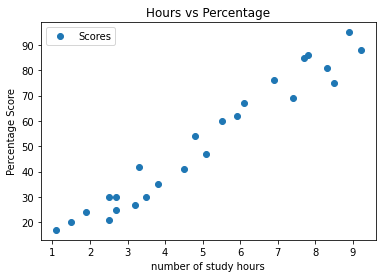

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

**Inference:** From the above graph, we can infer that there is a positive linear relation between the `number of study hours` and `Percentage Score`

## Step 3: Performing Simple Linear Regression

### Generic Steps in model building

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Score`, to the variable `y`. <br>
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Train-Test Split

we now need to split our variable into training and testing sets. we will perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
#Now let's take a look at train and test datasets individually
X_train

array([[9.2],
       [4.5],
       [3.5],
       [7.8],
       [2.5],
       [5.1],
       [2.7],
       [1.1],
       [1.9],
       [6.1],
       [3.2],
       [7.7],
       [2.5],
       [8.9],
       [5.5],
       [8.5],
       [8.3]])

In [11]:
y_train

array([88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95, 60, 75, 81],
      dtype=int64)

In [12]:
X_test

array([[2.7],
       [3.8],
       [3.3],
       [5.9],
       [1.5],
       [7.4],
       [6.9],
       [4.8]])

In [13]:
y_test

array([25, 35, 42, 62, 20, 69, 76, 54], dtype=int64)

## Step 4: Training the Algorithm
After splitting the data into training and testing sets,finally it's the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


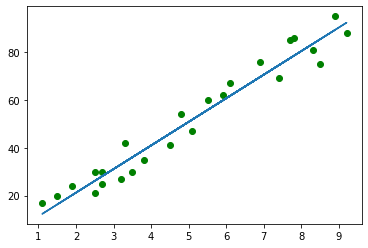

In [15]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'g')
plt.plot(X, line);
plt.show()

### Checking Accuracy Scores for both training as well as testing sets

In [16]:
print("Training Score:",lr.score(X_train,y_train)*100)
print("Testing Score:",lr.score(X_test,y_test)*100)

Training Score: 95.70735354094693
Testing Score: 93.09458862687437


## Step 5: Predictions on the Test Set

Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [17]:
y_test

array([25, 35, 42, 62, 20, 69, 76, 54], dtype=int64)

In [18]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]
 [4.8]]


In [19]:
y_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [20]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe 

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [21]:
# we can also test with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.80850057353504


## Step 6 (Final Step): Evaluating the model
The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332275
Mean Squared Error: 25.678419573283865


## Conclusion: 
1. After Analysing the dataset we got Predicted score around 93 based on the number of study hours i.e., 9.25 hrs/day.

# Thank you :)